### **FEATURE ENGINEERING (ANALYTICAL EXPLANATION IN SUBSEQUENT FILES ON REPO)**

#### **IMPORTING NECESSARY PACKAGES**

In [2]:
import pandas as pd                                  #for data reading
import numpy as np                                   #for mathematical ease
import matplotlib.pyplot as plt                      #for plotting
from sklearn.linear_model import LinearRegression    #for regression
from sklearn.model_selection import train_test_split #for training model
from sklearn.metrics import mean_squared_error       #for MSE
from sklearn.metrics import mean_absolute_error      #for MAE
from sklearn.ensemble import RandomForestRegressor   #training a second model - RandomForest

#### **LINEAR REGRESSION ANALYSIS (ONLY TESTING AND TRAINING THE MODEL HERE)**

Mean Squared Error: 6.1243693545365625


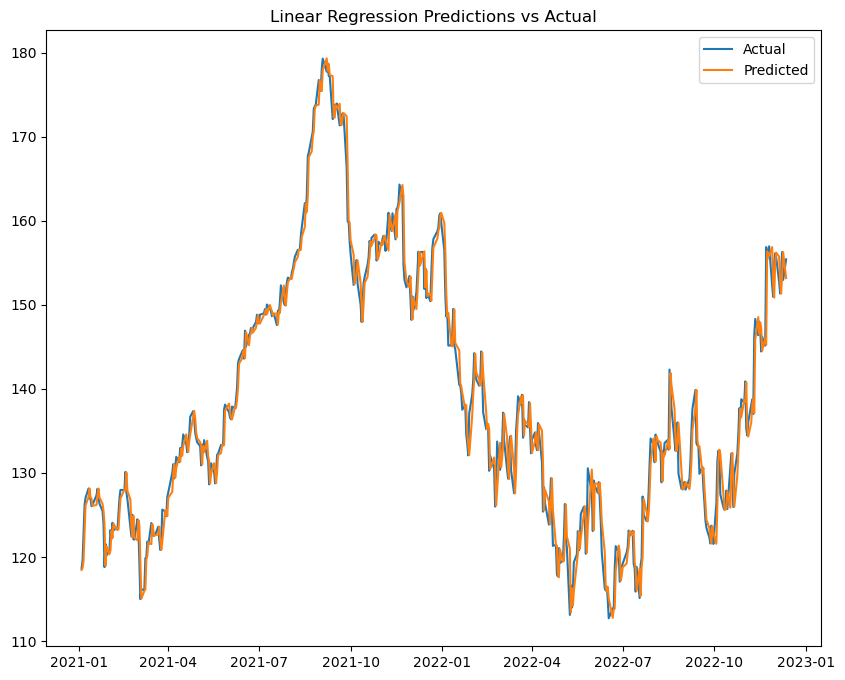

'\nTHERE ARE TINY MISALIGNMENTS FROM ACTUAL DATA, BUT NOTHING CATASTROPHIC. \nMODEL IS READY TO BE USED FOR FUTURE PREDICTION'

In [ ]:
df = pd.read_csv("apple.csv", parse_dates=['Date'], dayfirst = True)
# converted to datetime format as well
# dayfirst=True to avoid error
# had to run all the cells to prevent code from breaking upon making changes to code, thus importing again felt convenient

df['lag1'] = df['Close'].shift(1)
df['lag2'] = df['Close'].shift(2)
df['lag3'] = df['Close'].shift(3)
# by default, .shift() moves data down by one row
# so the first row gets an NaN value

df.set_index('Date', inplace=True)

# drop rows with NaN due to the above
df_2 = df.dropna().copy()

# defining features and target
X = df_2[['lag1', 'lag2', 'lag3']] # assigns the required columns under the x variable
y = df_2['Close']                  # y-axis would be the closing price

train_df = df_2[df_2.index < '2021-01-01']
test_df = df_2[df_2.index >= '2021-01-01']
# only dates 2021 and beyond

X_train = train_df[['lag1', 'lag2', 'lag3']]
y_train = train_df['Close']

X_test = test_df[['lag1', 'lag2', 'lag3']]
y_test = test_df['Close']
# feature engineering (used public github repositories to better understand how to execute this)
# first used train_test_split but remooved it, to make the code readable and manual splitting by date is done above

# training data Linear Regression plotting
model = LinearRegression()
model.fit(X_train, y_train)

# predict and evaluate
y_pred = model.predict(X_test) 
# using trained model to make predictions
#.predict() takes the test features as input

mse = mean_squared_error(y_test, y_pred)
# using mean squared error method

print("Mean Squared Error:", mse)
'''
For typical regression tasks, an MSE around 6.124 might not be great.
But for highly volatile stock market data, an MSE over 100 is usually considered poor, 
so 6.124 is actually pretty good here.

Note - the MSE assumptions of desirability can change depending on how large your dataset and volatility is'''
plt.figure(figsize=(10,8)) # figsize
plt.plot(y_test.index, y_test, label='Actual')       # model bring trained upon
plt.plot(y_test.index, y_pred, label='Predicted')    # predicted data, model being tested
plt.legend()                                         # adding a legend
plt.title('Linear Regression Predictions vs Actual') # adding a title
plt.show()                                           # shows the graph
'''
THERE ARE TINY MISALIGNMENTS FROM ACTUAL DATA, BUT NOTHING CATASTROPHIC. 
MODEL IS READY TO BE USED FOR FUTURE PREDICTION'''

#### **RandomForest Machine Learning Model to find PREDICTED NUMERIC VALUES**

In [ ]:
recent_df = df[df.index >= '2021-01-01'].dropna().copy()
# filtering df to get data for post 2021, dropping NaN values and creating a copy using .copy()

X_recent = recent_df[['lag1', 'lag2', 'lag3']]
# selects lag features from filtered df
y_recent = recent_df['Close']
# selects variable from filtered df

# further split recent data into train and test sets (80-20 split)
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_recent, y_recent, shuffle=False, test_size=0.2)
'''
train_test_split is a function from sklearn.model_selection that splits dataset into training and testing data
the split is a 80-20 split, 20% of data will become test set, 80% will be for training.
X_train_rf and y_train_rf is the training data for RandomForest
X_test_rf and y_test_rf is the testing data for RandomForest
X_recent is my feature variable
y_recent is my target variable that the model will learn to predict'''

# train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=40)

# n_estimators are the number of decision trees in my RandomForest
# more trees usually mean better accuracy but also mean more computation time
# means my forest has 100 trees voting to make a prediction

# random_state prevents getting different results each time you run the code

rf_model.fit(X_train_rf, y_train_rf)
# training model to predict

# predict on test set
y_pred_rf = rf_model.predict(X_test_rf)

mse_rf = mean_squared_error(y_test_rf, y_pred_rf)
# checking MSE for accuracy
print("RandomForest MSE on 2021+ data:",mse_rf)


# print prediction number
print("Predicted closing prices:",y_pred_rf[0])
# print a list of further predictions
print("Predicted closing prices:",y_pred_rf)


Random Forest MSE on 2021+ data: 10.891895373083395
Predicted closing prices: 121.98079986572266
Predicted closing prices: [121.98079987 125.89949921 128.13799965 128.73619827 132.24900009
 133.01689865 131.27679855 133.3707988  132.62559891 133.90539734
 133.24669739 130.55469986 133.00599991 131.98850021 133.984198
 133.43179642 133.32529816 142.97090103 140.48629715 137.29499863
 134.05659897 133.40179825 133.73609863 135.97759689 130.43450012
 129.45500015 129.58949768 127.97279846 128.32829773 128.1687986
 130.06289825 129.95689949 135.80200134 137.34389938 141.56769836
 134.39100052 134.61749802 134.84769562 131.45389786 131.33479935
 129.21920029 126.49709938 123.178899   122.77449966 124.61459908
 121.67640038 122.68550117 123.08759949 121.83480003 125.84679893
 128.45699966 132.29340103 133.41009827 127.72689835 126.57119873
 125.37779831 125.8538987  127.94629921 124.63489876 128.59699944
 132.25050171 129.94560104 126.71639786 130.11389877 132.03290176
 134.17939819 137.2780

#### **RMSE AND MAE VALUES**

In [ ]:
mse = mean_squared_error(y_test,y_pred)   # Mean Squared Errors (MSE)
rmse = np.sqrt(mse)                       # Root Mean Squared Errors (RMSE)
mae = mean_absolute_error(y_test, y_pred) # Mean Absolute Error (MAE)

print(f"MSE:, {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

MSE:, 6.1243693545365625
RMSE: 2.474746321249223
MAE: 1.8890180693314433
